In [2]:
import numpy as np
from scipy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import math
import time
import matplotlib.pylab as pltt
import scipy.sparse as sps

In [178]:
Re = 400
rho = 1
L = 1
V = 1
mu = rho*V*L/Re
w = 1

In [310]:
meshx = 4
deltax = L/meshx

meshy = meshx
deltay = L/meshy

mesht = 2 #para o primeiro tempo as velocidades e a pressão são zero
deltat = 1e50

In [311]:
''' coloquei dps
P = np.zeros(((mesht,meshx,meshy)))
u = np.zeros(((mesht,meshx,meshy)))
v = np.zeros(((mesht,meshx,meshy)))
'''

' coloquei dps\nP = np.zeros(((mesht,meshx,meshy)))\nu = np.zeros(((mesht,meshx,meshy)))\nv = np.zeros(((mesht,meshx,meshy)))\n'

In [312]:
# Massa do Volume de Controle
Mp=rho*deltax*deltay*w
# Termos Difusivos
De_u=mu*deltay*w/deltax
De_v=mu*deltay*w/deltax
Dw_u=mu*deltay*w/deltax
Dw_v=mu*deltay*w/deltax
Dn_u=mu*deltax*w/deltay
Dn_v=mu*deltax*w/deltay
Ds_u=mu*deltax*w/deltay
Ds_v=mu*deltax*w/deltay


In [313]:
#posição em relação a manlha da pressão
x_plot = np.zeros(meshx)
y_plot = np.zeros(meshy)
t_plot = np.zeros(mesht)

x_plot = np.linspace(-deltax/2,L-deltax/2,meshx)
y_plot = np.linspace(-deltay/2,L-deltay/2,meshy)

In [314]:
#CDS
P = np.zeros(((mesht,meshx,meshy)))
u = np.zeros(((mesht,meshx,meshy)))
v = np.zeros(((mesht,meshx,meshy)))

Me_u = np.zeros((meshx,meshy))
Mw_u = np.zeros((meshx,meshy))
Mn_u = np.zeros((meshx,meshy))
Ms_u = np.zeros((meshx,meshy))

Me_v = np.zeros((meshx,meshy))
Mw_v = np.zeros((meshx,meshy))
Mn_v = np.zeros((meshx,meshy))
Ms_v = np.zeros((meshx,meshy))

ae_u = np.zeros((meshx,meshy))
aw_u = np.zeros((meshx,meshy))
an_u = np.zeros((meshx,meshy))
as_u = np.zeros((meshx,meshy))
ap0_u = np.zeros((meshx,meshy))
b_u = np.zeros((meshx,meshy))
ap_u = np.zeros((meshx,meshy))
ae_v = np.zeros((meshx,meshy))
aw_v = np.zeros((meshx,meshy))
an_v = np.zeros((meshx,meshy))
as_v = np.zeros((meshx,meshy))
ap0_v = np.zeros((meshx,meshy))
b_v = np.zeros((meshx,meshy))
ap_v = np.zeros((meshx,meshy))

u_antigo = np.zeros((meshx,meshy))
v_antigo = np.zeros((meshx,meshy))
P_antigo = np.zeros((meshx,meshy))

eps = 1e-4
erro = 1
for t in range(1,mesht):
    iteracoes = 0
    while (erro > eps): 
        u_antigo[:,:] = u[t,:,:]
        v_antigo[:,:] = v[t,:,:]
        P_antigo[:,:] = P[t,:,:]
        
        for y in range(1,meshy-1):
            for x in range(1,meshx-1):            
                Me_u[x,y] = rho*(u[t,x,y]+u[t,x+1,y])/2*deltay*w
                Mw_u[x,y] = rho*(u[t,x,y]+u[t,x-1,y])/2*deltay*w
                Mn_u[x,y] = rho*(v[t,x,y]+v[t,x,y+1])/2*deltax*w
                Ms_u[x,y] = rho*(v[t,x,y-1]+v[t,x+1,y-1])/2*deltax*w
                
                Me_v[x,y] = rho*(u[t,x,y]+u[t,x,y+1])/2*deltay*w
                Mw_v[x,y] = rho*(u[t,x-1,y+1]+u[t,x-1,y])/2*deltay*w
                Mn_v[x,y] = rho*(v[t,x,y]+v[t,x,y+1])/2*deltax*w
                Ms_v[x,y] = rho*(v[t,x,y]+v[t,x,y-1])/2*deltax*w

                ae_u[x,y] = De_u - Me_u[x,y]/2
                aw_u[x,y] = Dw_u + Mw_u[x,y]/2
                an_u[x,y] = Dn_u - Mn_u[x,y]/2
                as_u[x,y] = Ds_u + Ms_u[x,y]/2
                ap0_u[x,y] = Mp/deltat
                b_u[x,y] =ap0_u[x,y]*u[t-1,x,y]
                ap_u[x,y] = ae_u[x,y] + aw_u[x,y] + an_u[x,y] + as_u[x,y] + ap0_u[x,y]
                
                ae_v[x,y] = De_v - Me_v[x,y]/2
                aw_v[x,y] = Dw_v + Mw_v[x,y]/2
                an_v[x,y] = Dn_v - Mn_v[x,y]/2
                as_v[x,y] = Ds_v + Ms_v[x,y]/2
                ap0_v[x,y] = Mp/deltat
                b_v[x,y] =ap0_v[x,y]*v[t-1,x,y]
                ap_v[x,y] = ae_v[x,y] + aw_v[x,y] + an_v[x,y] + as_v[x,y] + ap0_v[x,y]
        ##Condições de contorno para C.Q.M em x:
        #face esquerda        
        for y in range(meshy):
            ap_u[0,y] = 1
            b_u[0,y] = 0
            
        #face direita
        for y in range(meshy):
            ap_u[meshx-1,y] = 1
            b_u[meshx-1,y] = 0
            
        #face norte
        for x in range(1,meshx-1):
            ae_u[x,meshy-1] = De_u - Me_u[x,meshy-1]/2
            aw_u[x,meshy-1] = Dw_u + Mw_u[x,meshy-1]/2
            an_u[x,meshy-1] = 0
            as_u[x,meshy-1] = Ds_u +Ms_u[x,meshy-1]/2
            ap0_u[x,meshy-1] = Mp/deltat
            b_u[x,meshy-1] = ap0_u[x,meshy-1]*u[t-1,x,meshy-1] + 2*Dn_u*V
            ap_u[x,meshy-1] = ae_u[x,meshy-1] + aw_u[x,meshy-1] + an_u[x,meshy-1] + as_u[x,meshy-1] + ap0_u[x,meshy-1] +2*Ds_u
            
        #face sul ficticia -> não importa os valores de u
        for x in range(meshx):
            ap_u[x,0] = 1
            b_u[x,0] = 0
            
        #face sul real
        for x in range(1,meshx-1):
            ae_u[x,1] = De_u - Me_u[x,1]/2
            aw_u[x,1] = Dw_u + Mw_u[x,1]/2
            an_u[x,1] = Dn_u - Mn_u[x,1]/2
            as_u[x,1] = 0
            ap0_u[x,1] = Mp/deltat
            b_u[x,1] = ap0_u[x,1]*u[t-1,x,1]
            ap_u[x,1] = ae_u[x,1] + aw_u[x,1] + an_u[x,1] + as_u[x,1] + ap0_u[x,1] +2*Ds_u
        ##Fim CC para C.Q.M. em x
        
        ##Condições de contorno para C.Q.M em y:
        #face norte
        for x in range(meshx):
            ap_v[x,meshy-1] = 1
            b_v[x,meshy-1] = 0
           
        #face sul
        for x in range(meshx):
            ap_v[x,0] = 1
            b_v[x,0] = 0
            
        #face esquerda ficticia -> não importa valores de v nesses pontos
        for y in range(meshy):
            ap_v[0,y] = 1
            b_v[0,y] = 0
            
        #face esquerda real
        for y in range(1,meshy-1):
            ae_v[1,y] = De_v - Me_v[1,y]/2 
            aw_v[1,y] = 0
            an_v[1,y] = Dn_v - Mn_v[1,y]/2
            as_v[1,y] = Ds_v + Ms_v[1,y]/2
            ap0_v[1,y] = Mp/deltat
            b_v[1,y] = ap0_v[1,y]*v[t-1,1,y]
            ap_v[1,y] = ae_v[1,y] + aw_v[1,y] + an_v[1,y] + as_v[1,y] + ap0_v[1,y] + 2*Dw_v
            
        #face direita
        for y in range(1,meshy-1):
            ae_v[meshx-1,y] = 0
            aw_v[meshx-1,y] = Dw_v + Mw_v[meshx-1,y]/2
            an_v[meshx-1,y] = Dn_v - Mn_v[meshx-1,y]/2
            as_v[meshx-1,y] = Ds_v + Ms_v[meshx-1,y]/2
            ap0_v[meshx-1,y] = Mp/deltat
            b_v[meshx-1,y] = ap0_v[1,y]*v[t-1,meshx-1,y]
            ap_v[meshx-1,y] = ae_v[meshx-1,y] + aw_v[meshx-1,y] + an_v[meshx-1,y] + as_v[meshx-1,y] + ap0_v[meshx-1,y] + 2*De_v
        ##Fim CC para C.Q.M. em y
        
        #Montando a matriz de coef
        Matrix_coef_A = np.zeros((3*meshx*meshy,3*meshx*meshy))
        Matrix_coef_B = np.zeros((3*meshx*meshy,1))
        cont = 0
        
        #1º quadrante
        for y in range(meshy):
            for x in range(meshx):
                Matrix_coef_A[cont,cont] = ap_u[x,y]
                if (cont < meshx*meshy-1):
                    Matrix_coef_A[cont,cont+1] = -ae_u[x,y]
                if (cont > 0):
                    Matrix_coef_A[cont,cont-1] = -aw_u[x,y]
                if (cont < meshx*meshy - meshx):
                    Matrix_coef_A[cont,cont+meshx] = -an_u[x,y]
                if (cont > meshx-1):
                    Matrix_coef_A[cont,cont-meshx] = -as_u[x,y]
                Matrix_coef_B[cont,0] = b_u[x,y]
                #3º quadrante
                if (x != 0) and (y != 0) and (x != meshx-1):
                    Matrix_coef_A[cont, cont + 2*meshx*meshy] = -w*deltay
                    if (cont < meshx*meshy-1):
                        Matrix_coef_A[cont, cont + 2*meshx*meshy+1] = w*deltay
                cont += 1
                
        #5º quadrante
        cont = meshx*meshy
        for y in range(meshy):
            for x in range(meshx):
                Matrix_coef_A[cont,cont] = ap_v[x,y]
                if (cont < 2*meshx*meshy-1):
                    Matrix_coef_A[cont,cont+1] = -ae_v[x,y]
                if (cont >meshx*meshy):
                    Matrix_coef_A[cont,cont-1] = -aw_v[x,y]
                if (cont < 2*meshx*meshy - meshx):
                    Matrix_coef_A[cont,cont+meshx] = -an_v[x,y]
                if (cont > meshx*meshy + meshx-1):
                    Matrix_coef_A[cont,cont-meshx] = as_v[x,y]
                Matrix_coef_B[cont,0] = b_v[x,y]
                #6º quadrante
                if (x != 0) and (y != 0) and (y != meshy-1):
                    Matrix_coef_A[cont, cont + meshx*meshy] = w*deltax
                    if (cont < 2*meshx*meshy-meshx):
                        Matrix_coef_A[cont, cont + meshx*meshy+meshx] = -w*deltax
                cont += 1
                
        #7º quadrante
        cont = 2*meshx*meshy
        i = 0
        for y in range(meshy):
            for x in range(meshx):
                if (x != 0) and (y != 0):
                    Matrix_coef_A[cont,i] = deltay*w
                    Matrix_coef_A[cont,i-1] = -deltax*w

                    #8º quadrante
                    Matrix_coef_A[cont,i+meshx*meshy] = deltax*w
                    Matrix_coef_A[cont,i+meshx*meshy-meshx] = -deltax*w
                cont += 1
                i += 1
            
        cont = 2*meshx*meshy
        #9º quadrante
        for y in range(meshy):
            for x in range(meshx):
                #para os volumes ficticios, pressão = 0
                if (x==0) or (y == 0):
                    Matrix_coef_A[cont,cont] = 1
                cont += 1
        #determinando pressão de referência = 0 no último volume
        Matrix_coef_A[meshx*meshy*3-1,:] = 0 #rever dps
        Matrix_coef_A[meshx*meshy*3-1,meshx*meshy*3-1] = 1
        
        Resultado = solve(Matrix_coef_A,Matrix_coef_B)
        cont = 0
        for y in range(meshy):
            for x in range(meshx):
                u[t,x,y] = Resultado[cont,0]
                cont += 1
        #cont = meshx*meshy        
        for y in range(meshy):
            for x in range(meshx):
                v[t,x,y] = Resultado[cont,0]
                cont += 1
        #cont = meshx*meshy*2        
        for y in range(meshy):
            for x in range(meshx):
                P[t,x,y] = Resultado[cont,0]
                cont += 1
        erro_u = (u[t,:,:] - u_antigo[:,:])
        erro_v = (v[t,:,:] - v_antigo[:,:])
        erro_P = (P[t,:,:] - P_antigo[:,:])
        erro = max(abs(erro_u.max()),abs(erro_v.max()),abs(erro_P.max()))
        iteracoes += 1
        print(iteracoes)
        if (iteracoes == 500):
            erro = 0 #mudar dps
                

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [323]:
Me_u[:,meshy-1]

array([ 0.,  0.,  0.,  0.])

In [315]:
erro_u

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.55431427, -0.14990401, -0.40441026],
       [ 0.        ,  0.00277211, -0.20851474,  0.20574263],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [316]:
erro_v

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.55431427, -0.40441026,  0.        ],
       [ 0.        ,  0.55154216,  0.61015289,  0.        ],
       [ 0.        ,  0.00277211, -0.20574263,  0.        ]])

In [317]:
erro_P

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.03693285,  0.00478386, -0.00436252],
       [ 0.        , -0.02394231, -0.01193907,  0.01641638],
       [ 0.        ,  0.01968033,  0.01636094,  0.        ]])

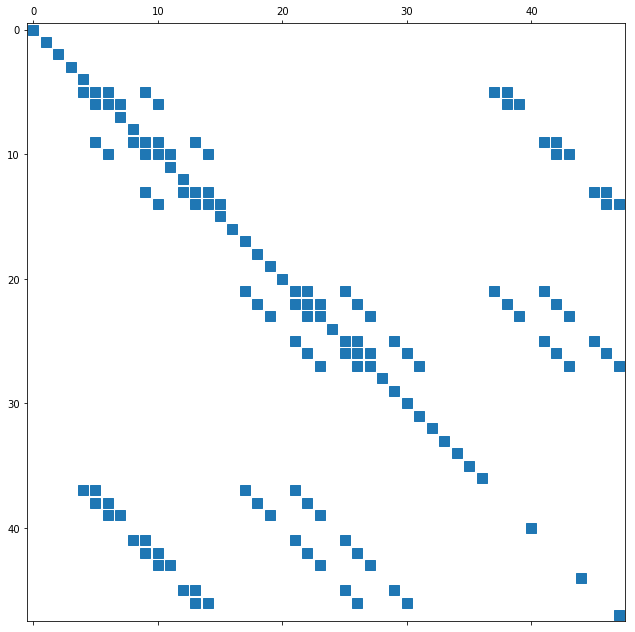

In [318]:
%matplotlib inline
M = sps.csr_matrix(Matrix_coef_A)
fig, ax = pltt.subplots(figsize=(11,11))
ax.spy(M)


C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Gusttav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


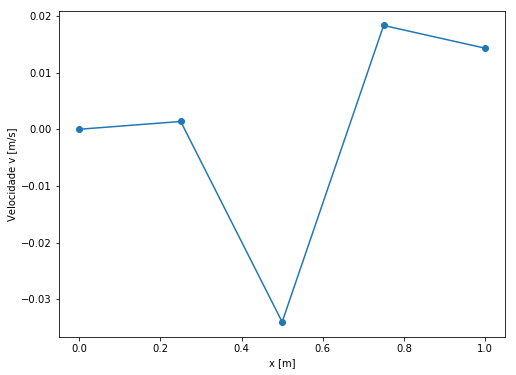

In [302]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)   

axis.plot(x_plot+deltax/2,v[1,:,(meshx-1)/2],marker='o')

axis.set_ylabel('Velocidade v [m/s]')
axis.set_xlabel('x [m]')
axis.set_title('')
axis.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axis.set_ylim(30,100)
#axis.set_xlim(-0.05,0.45)
